# Import necessary libraries

In [36]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

Number of drifted records detected: 980
The updated data with calculated drift flags has been saved to 'D:\Python_notebook_files\data_drift_files\updated_cabin_temperature_data.csv'


In [ ]:
# Load the generated data
data = pd.read_csv(r'D:\Python_notebook_files\data_drift_files\cabin_temperature_data.csv')

# Implement Kolmogorov-Smirnov (KS) test combined with Feature Drift Analysis

In [ ]:
# Initialize the calculated_drift_flag column with 0
data['calculated_drift_flag'] = 0

# Define a function to calculate statistical properties and detect drift using KS test
def detect_drift(data, feature, window_size=490, threshold=0.01):
    drifted_indices = []
    for i in range(0, len(data) - window_size, window_size):
        normal_data = data[feature].iloc[i:i + window_size]
        new_data = data[feature].iloc[i + window_size:i + 2 * window_size]

        if len(new_data) < window_size:
            break

        # Perform KS test
        ks_stat, p_value = ks_2samp(normal_data, new_data)

        # Detect drift
        if p_value < threshold:
            drifted_indices.extend(data.iloc[i + window_size:i + 2 * window_size].index)

    return drifted_indices


In [ ]:
# Detect drift for each relevant feature
for feature in ['Cabin_Temperature', 'Temp_Diff']:
    detected_drift = detect_drift(data, feature)
    data.loc[detected_drift, 'calculated_drift_flag'] = 1

In [ ]:
# Display the count of drifted records detected by the algorithm
num_drifted_records = len(data[data['calculated_drift_flag'] == 1])
print(f"Number of drifted records detected: {num_drifted_records}")

# Save the updated DataFrame to a new CSV file
data.to_csv(r'D:\Python_notebook_files\data_drift_files\updated_cabin_temperature_data.csv', index=False)
print("The updated data with calculated drift flags has been saved to 'D:\\Python_notebook_files\\data_drift_files\\updated_cabin_temperature_data.csv'")


# Evaluate the Model with Confusion Matrix

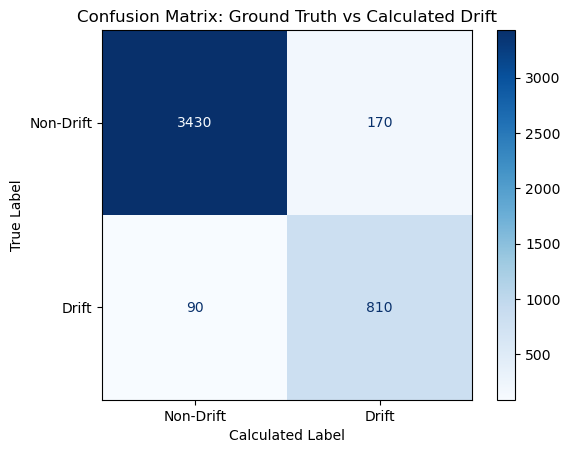

Precision: 0.83
Recall: 0.90
F1 Score: 0.86
Accuracy: 0.94


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

# Load the updated data with calculated drift flags
data = pd.read_csv(r'D:\Python_notebook_files\data_drift_files\updated_cabin_temperature_data.csv')

# Extract the ground truth and calculated flags
y_true = data['Drift_Flag']
y_pred = data['calculated_drift_flag']

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Drift', 'Drift'])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Calculated Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Ground Truth vs Calculated Drift')
plt.show()

# Calculate and display precision, recall, F1 score, and accuracy
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
